In [21]:
#!pip install --upgrade pyarrow

In [22]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, 
GridSearchCV, StratifiedKFold)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Saving the Model
from pickle import dump
from pickle import load


In [23]:
import warnings
warnings.filterwarnings("ignore")

## Leer Datos

In [24]:
url_train = "https://github.com/sonder-art/automl_p24/raw/main/codigo/ml_practico/data_train_model.parquet"
data_train = pd.read_parquet(url_train)
data_train.head()

,loan_amnt,term,int_rate,annual_inc,dti,earliest_cr_line,fico_range_low,open_acc,revol_util,last_pymnt_amnt,...,num_actv_rev_tl,charged_off,home_ownership_MORTGAGE,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation
62394,3600.0,36,14.49,128000.0,9.13,1993.0,690.0,7.0,98.2,123.81,...,6.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2333,20000.0,36,12.99,50000.0,11.93,2000.0,700.0,9.0,37.9,2667.57,...,4.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
91099,10000.0,60,9.17,50000.0,17.64,1997.0,780.0,10.0,27.1,4260.28,...,4.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
31904,1500.0,36,12.39,62000.0,13.34,1995.0,695.0,8.0,40.0,49.73,...,4.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58152,21000.0,36,9.17,121000.0,20.29,1985.0,675.0,15.0,87.3,669.34,...,7.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
url_test = "https://github.com/sonder-art/automl_p24/raw/main/codigo/ml_practico/data_test_model.parquet"
data_test = pd.read_parquet(url_test)
data_test.head()

,loan_amnt,term,int_rate,annual_inc,dti,earliest_cr_line,fico_range_low,open_acc,revol_util,last_pymnt_amnt,...,num_actv_rev_tl,charged_off,home_ownership_MORTGAGE,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation
92063,10000.0,36,11.67,44000.0,17.84,2003.0,710.0,10.0,48.4,330.86,...,4.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88089,20000.0,36,12.99,85000.0,28.42,1997.0,680.0,32.0,52.3,13374.02,...,18.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
63335,20000.0,60,16.29,80000.0,16.26,2005.0,665.0,10.0,70.5,489.45,...,5.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
63184,8000.0,36,10.99,53000.0,6.20,1998.0,695.0,5.0,88.7,5288.02,...,5.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
96477,28000.0,36,6.03,102000.0,8.94,2002.0,775.0,9.0,24.9,2550.44,...,2.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
datos_dict = pd.read_excel('https://resources.lendingclub.com/LCDataDictionary.xlsx')
datos_dict.columns = ['feature', 'description']

In [27]:
datos_dict

,feature,description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...
150,settlement_term,The number of months that the borrower will be...
151,NaN,NaN


# Modelaje

**Nota**: Para conducir los procesos anteriores no dividimos train y test, por lo que existe **leakage** en nuestro modelo. Sin embargo, dado que este es un subsample (150K) de la base completa (887K) no hay tanto problema pues tenemos muchas observaciones para hacer validacion.  

Sin embargo, cualquier division que hagamos de los datos que ya analizamos tendra leakage. Por ejemplo, vamos a subestimar el error, pues usamos correlacion con la varaible objetivo para elegir variables.  

Normalemente se hacen analisis de esta manera si sabemos que tendremos mucho mas datos nuevos. Aunque, en estricto sentido esta mal, pero nos ayuda a ahorrarnos tiempo y hacer el codigo mas sencillo. Pues no tenemos que manejar diferentes bases.  

Lo correcto es al acabar este analisis, es optimizar/refactor el codigo que tenemos y entonces si hacer un analisis con lo aprendido y con los datos divididos desde el inicio.

Hay algoritmos que pueden manejar el imbalance de clases automaticamente sin necesidad de hacer sub/over-sampling.Es recomendable utilizarlos![image.png](attachment:image.png)

In [28]:
df_train = data_train.copy()
df_test = data_test.copy()
df_train.rename(columns={'charged_off':'y'}, inplace=True)
df_test.rename(columns={'charged_off':'y'}, inplace=True)

In [29]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_train = pd.DataFrame(imp_mean.fit_transform(df_train), columns=df_train.columns)

df_test = pd.DataFrame(imp_mean.fit_transform(df_test), columns=df_test.columns)


In [30]:
print(df_test.shape)
print(df_train.shape)

(17228, 27)
(68909, 27)


## (sub) Sampleo de Datos

Dado que tenemos clases desbalanceadas podemos realizar subsampling (reduccion) de la clase con mas etiquetas, o oversampling (aumento) de la clase con menos etiquetas.  Para la clase realizaremos, subsampling. De **tarea** realiza oversampling (seccion de abajo).

In [31]:
df_train_sub = df_train.copy()

In [32]:
df_train_sub['y'].value_counts()

y
0.0    55984
1.0    12925
Name: count, dtype: int64

In [33]:
default_0 = df_train_sub[df_train_sub['y']==0]
default_1 = df_train_sub[df_train_sub['y']==1]
# Subsample default_0
default_0 = default_0.sample(n=default_1.shape[0], random_state=152, 
                             replace=False)
# Merge datasets
df_train_sub = pd.concat([default_1, default_0],ignore_index=True)
df_train_sub = df_train_sub.sample(frac=1.0).reset_index(drop=True)
df_train_sub['y'].value_counts()

y
0.0    12925
1.0    12925
Name: count, dtype: int64

## (over) Sampleo de Datos

La siguiente celda contiene el codigo de oversampling.  
+ Piensa si el oversampling de datos deberia hacerse despues o antes de train/test, o de alguna otra forma?
**Haganlo en el CV no antes para no repetir observaciones**. Aqui esta mal hecho pues se hizo antes de separar por CV, lo cual causa que existan observaciones repetidas en el train y validacion/test de los sets del Cross Validation. Es un error!

In [34]:
df_train_over = df_train.copy()
df_train_over['y'].value_counts()

y
0.0    55984
1.0    12925
Name: count, dtype: int64

In [35]:
default_0 = df_train_over[df_train_over['y']==0]
default_1 = df_train_over[df_train_over['y']==1]
# Subsample default_1
default_1 = default_1.sample(frac=default_0.shape[0]/default_1.shape[0], random_state=152, 
                             replace=True)
default_1.shape

(55984, 27)

In [36]:
# Merge datasets
df_train_over = pd.concat([default_1, default_0],ignore_index=True)
df_train_over['y'].value_counts()

y
1.0    55984
0.0    55984
Name: count, dtype: int64

## Modelos

Scoring Metrics [source](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [37]:
# Normalizacion
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

def model_selection(df_train, num_folds=3, seed = 7364, scoring=["accuracy","balanced_accuracy","roc_auc", "f1"]):
    X_train = df_train.drop(columns=['y'])
    Y_train = df_train['y']

    mm_scaler = preprocessing.MinMaxScaler()
    X_train = mm_scaler.fit_transform(X_train)

    # spot check the algorithms
    models = []
    #models.append(('DC', DummyClassifier(strategy="most_frequent")))
    models.append(('LR', LogisticRegression(max_iter=500)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    #models.append(('CART', DecisionTreeClassifier()))
    #models.append(('NB', GaussianNB()))
    #Neural Network
    models.append(('NN', MLPClassifier(max_iter=500, solver='sgd', 
                                    early_stopping=True)))
    #Ensable Models 
    # Boosting methods
    #models.append(('AB', AdaBoostClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    # Bagging methods
    models.append(('RF', RandomForestClassifier()))
    #models.append(('ET', ExtraTreesClassifier()))

    # ##Opciones

    results = [] 

    for name, model in models:
        print(f"Model: {name}")
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        cv_results = cross_validate(model, X_train, Y_train, cv=kfold,
                                    scoring=scoring, n_jobs=-1)
        cv_results = pd.DataFrame(cv_results)
        #print(cv_results.mean())
        # msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        # print(msg)
        # cv_results = pd.DataFrame({
        #     'results':cv_results
        # })
        cv_results.loc[:,'model_name'] = name
        results.append(cv_results)

    # Convertir todos los resultados un solo DataFrame
    results = pd.concat(results, ignore_index=True)
    print(results.groupby(['model_name'], as_index=False).describe())
    results_plot =  [c for c in results.columns if 'time' not in c]
    results_plot = results.loc[:,results_plot]
    results_plot = pd.melt(
        results_plot, id_vars='model_name', var_name="metric")
    #results_plot = results_plot[results_plot['metric']]
    g = sns.FacetGrid(results_plot, row="metric",
                      height=3, aspect=1, sharex=False)
    g.map(sns.boxplot, 'model_name','value')
    g.fig.set_size_inches(13, 20)
    
    return results

In [38]:
import warnings
warnings.filterwarnings("ignore")
df_result_all = model_selection(df_train, num_folds=5)

Model: LR


/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/panda

Model: LDA


/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Model: KNN


KeyboardInterrupt: 

Model: LR
Model: LDA
Model: KNN
Model: NN
Model: GBM
Model: RF
  model_name fit_time                                                        \
                count       mean       std        min        25%        50%   
0        GBM      5.0  11.426918  0.234220  11.099326  11.331234  11.400360   
1        KNN      5.0   0.006991  0.000692   0.005821   0.007046   0.007080   
2        LDA      5.0   0.117828  0.033995   0.077924   0.083436   0.141221   
3         LR      5.0   0.356498  0.021304   0.331436   0.335766   0.366506   
4         NN      5.0   9.379435  1.577506   7.645631   8.333754   9.285231   
5         RF      5.0   6.856254  0.385576   6.384377   6.564361   6.901812   

                        score_time  ... test_roc_auc           test_f1  \
         75%        max      count  ...          75%       max   count   
0  11.628561  11.675109        5.0  ...     0.940907  0.944074     5.0   
1   0.007437   0.007572        5.0  ...     0.827784  0.831049     5.0   
2   0.14

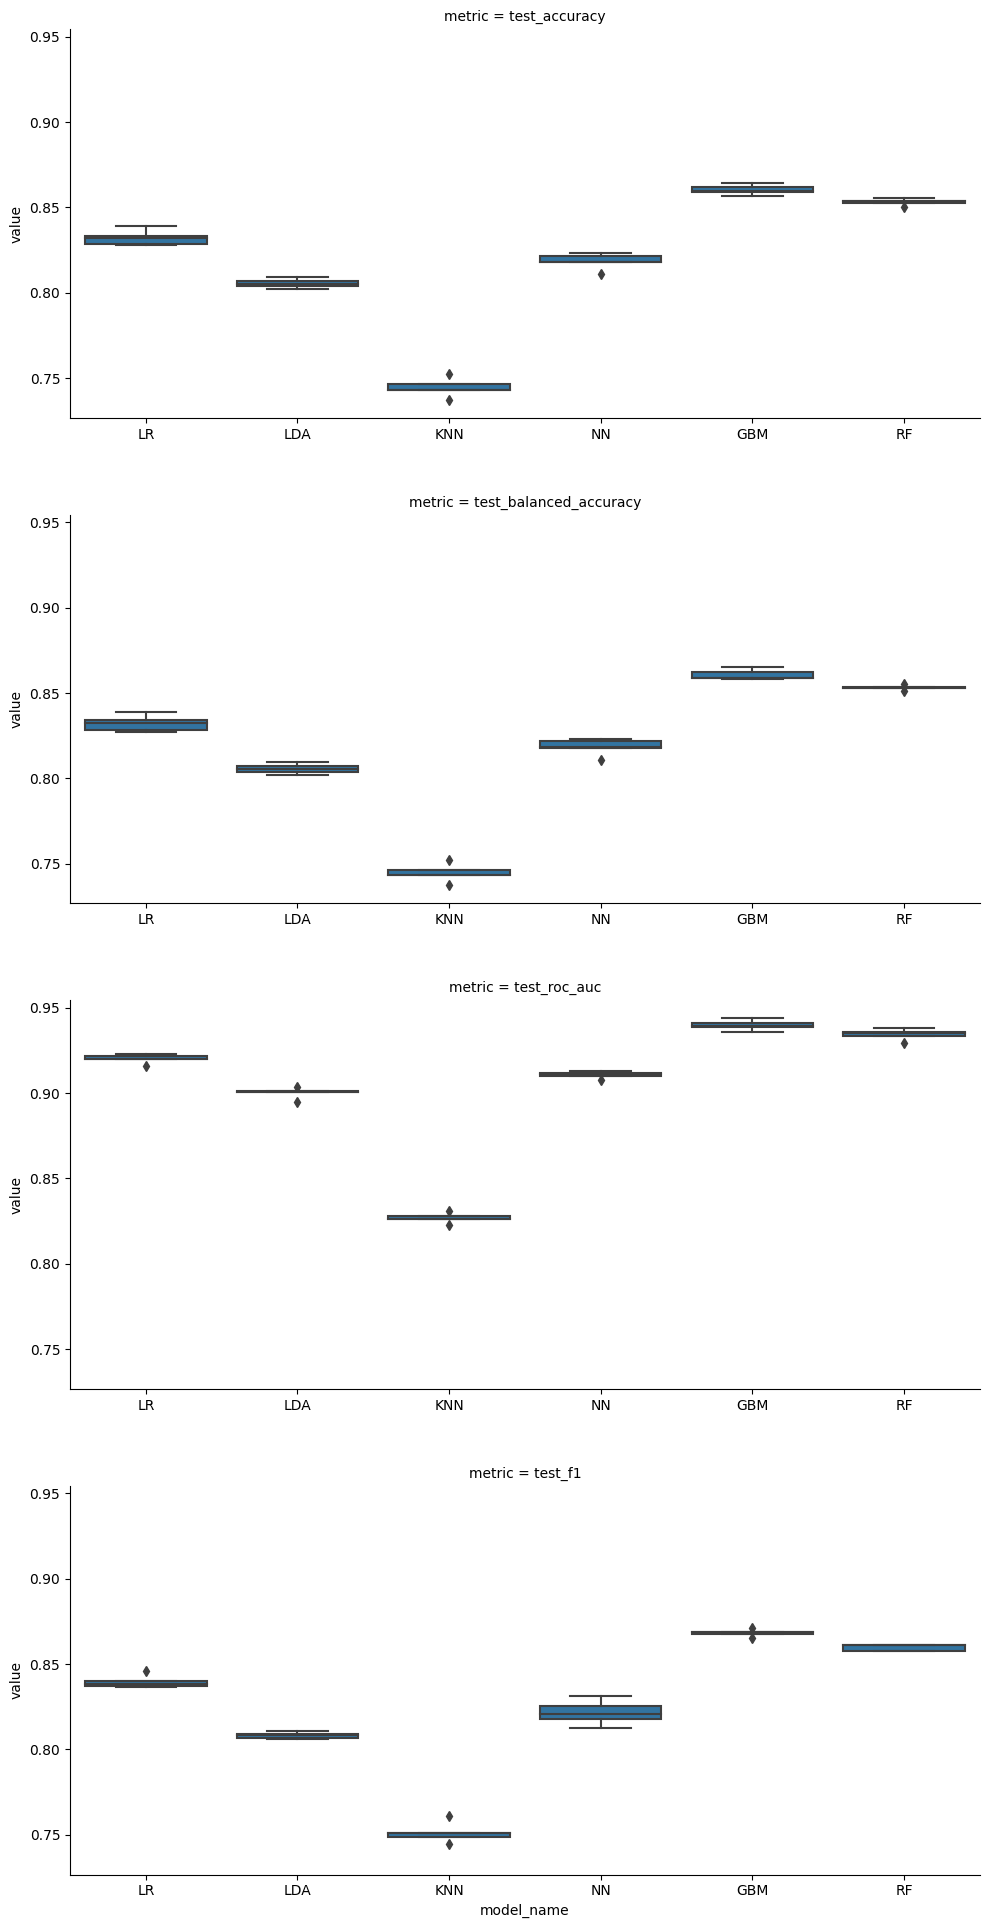

In [ ]:
df_result_sub = model_selection(df_train_sub, num_folds=5)

Model: LR
Model: LDA
Model: KNN
Model: NN
Model: GBM
Model: RF
  model_name fit_time                                                        \
                count       mean       std        min        25%        50%   
0        GBM      5.0  50.850021  1.562891  48.787121  50.206836  50.427520   
1        KNN      5.0   0.031488  0.003456   0.028485   0.028883   0.029577   
2        LDA      5.0   0.772503  0.179459   0.452980   0.829509   0.842572   
3         LR      5.0   1.895745  0.209454   1.573889   1.863419   1.874978   
4         NN      5.0  31.149473  9.669618  21.181987  24.972682  31.281260   
5         RF      5.0  28.443376  2.062791  26.220066  26.501856  28.560387   

                        score_time  ... test_roc_auc           test_f1  \
         75%        max      count  ...          75%       max   count   
0  52.294448  52.534179        5.0  ...     0.943265  0.945338     5.0   
1   0.035080   0.035414        5.0  ...     0.914974  0.917746     5.0   
2   0.86

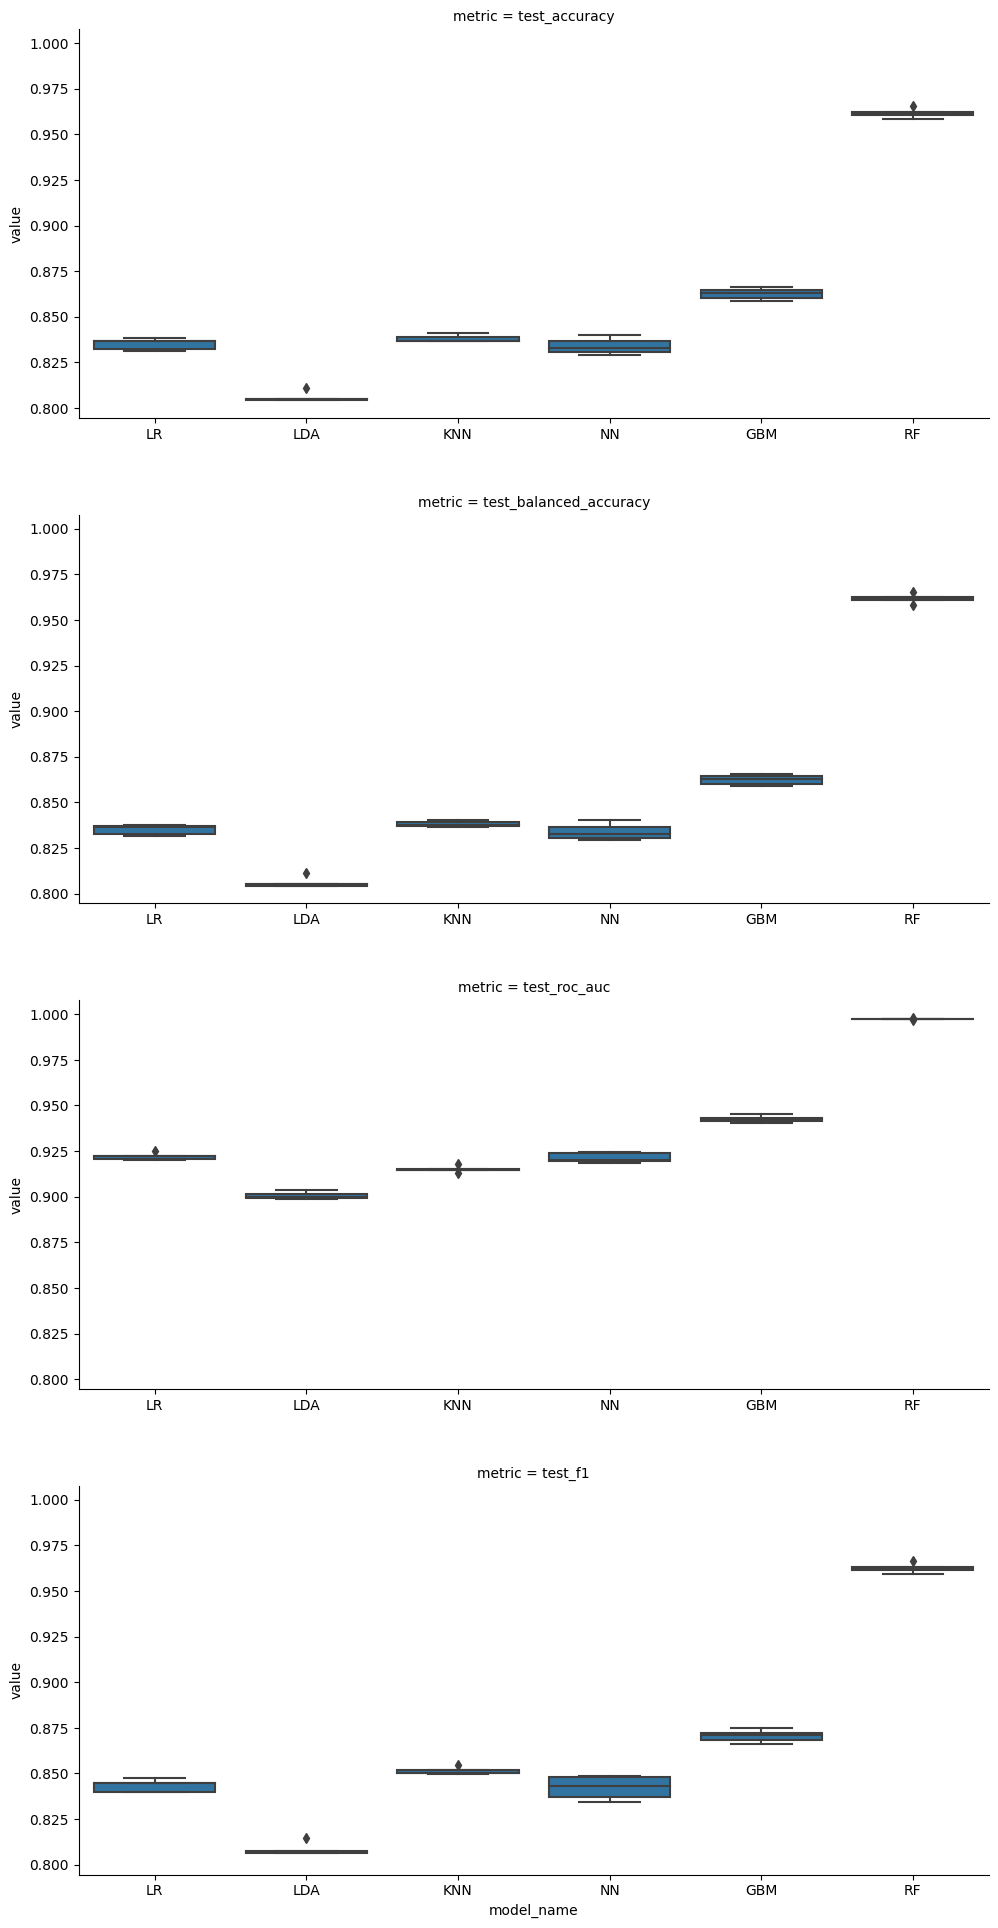

In [ ]:
df_result_over = model_selection(df_train_over, num_folds=5)


## Fine tuning

In [ ]:
def fine_tuning(df_train, model, param_grid, scoring="balanced_accuracy", k_fold=5, seed=345):
    
    X_train = df_train.drop(columns=['y'])
    Y_train = df_train['y']

    mm_scaler = preprocessing.MinMaxScaler()
    X_train = mm_scaler.fit_transform(X_train)

    kfold = KFold(n_splits=k_fold, random_state=seed, shuffle=True)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring,
                        cv=kfold, n_jobs=-1)
    grid_result = grid.fit(X_train, Y_train)

    #Print Results
    print("Mejor: %f using %s" %
        (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    ranks = grid_result.cv_results_['rank_test_score']
    for mean, stdev, param, rank in zip(means, stds, params, ranks):
        print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))
        
    return grid_result


In [ ]:
# Grid Search: GradientBoosting
'''
n_estimators : int (default=100)
    Numero de boostings que realiza. Es bastante robusto a overfitting,
    en comparacion con otros algoritmos de boosting. Por lo que, podemos usar
    un numero grande.
max_depth : integer, optional (default=3)
    El depth o profundida de los estimadores individuales. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; 
    the best value depends on the interaction of the input variables.

'''
n_estimators = [50, 100, 150, 180]
max_depth = [5, 7]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()


In [ ]:
all_model = fine_tuning(df_train, model=model, param_grid=param_grid,
                        scoring="balanced_accuracy", k_fold=5, seed=345)
pd.DataFrame(all_model.cv_results_)


Mejor: 0.781346 using {'max_depth': 7, 'n_estimators': 150}
#8 0.759158 (0.004543) with: {'max_depth': 5, 'n_estimators': 50}
#6 0.771313 (0.005677) with: {'max_depth': 5, 'n_estimators': 100}
#5 0.773890 (0.005764) with: {'max_depth': 5, 'n_estimators': 150}
#3 0.776636 (0.004630) with: {'max_depth': 5, 'n_estimators': 180}
#7 0.766908 (0.005788) with: {'max_depth': 7, 'n_estimators': 50}
#4 0.775674 (0.005263) with: {'max_depth': 7, 'n_estimators': 100}
#1 0.781346 (0.004852) with: {'max_depth': 7, 'n_estimators': 150}
#2 0.781341 (0.005413) with: {'max_depth': 7, 'n_estimators': 180}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,37.578530,1.944942,0.062967,0.007983,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.762323,0.757991,0.751478,0.764888,0.759107,0.759158,0.004543,8
1,78.978937,1.907447,0.080213,0.013865,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.769637,0.768265,0.765070,0.781794,0.771801,0.771313,0.005677,6
2,115.657168,2.894767,0.116613,0.020236,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.772322,0.771033,0.767678,0.784700,0.773717,0.773890,0.005764,5
3,127.885669,7.896184,0.111791,0.010648,5,180,"{'max_depth': 5, 'n_estimators': 180}",0.776236,0.774623,0.772185,0.785527,0.774611,0.776636,0.004630,3
4,52.761378,0.855330,0.084597,0.028872,7,50,"{'max_depth': 7, 'n_estimators': 50}",0.768154,0.762571,0.759291,0.776249,0.768277,0.766908,0.005788,7
5,103.381836,1.149170,0.095576,0.008112,7,100,"{'max_depth': 7, 'n_estimators': 100}",0.776107,0.772955,0.769063,0.785004,0.775241,0.775674,0.005263,4
6,149.588892,3.444415,0.118866,0.012984,7,150,"{'max_depth': 7, 'n_estimators': 150}",0.779853,0.778730,0.777018,0.790776,0.780353,0.781346,0.004852,1
7,150.771174,14.701197,0.089684,0.021339,7,180,"{'max_depth': 7, 'n_estimators': 180}",0.777018,0.780290,0.776566,0.791533,0.781299,0.781341,0.005413,2


In [ ]:
sub_model = fine_tuning(df_train_sub, model=model, param_grid=param_grid,
                        scoring="balanced_accuracy", k_fold=5, seed=345)
pd.DataFrame(sub_model.cv_results_)



Mejor: 0.862533 using {'max_depth': 7, 'n_estimators': 100}
#6 0.860534 (0.005162) with: {'max_depth': 5, 'n_estimators': 50}
#2 0.862282 (0.005868) with: {'max_depth': 5, 'n_estimators': 100}
#3 0.861739 (0.004962) with: {'max_depth': 5, 'n_estimators': 150}
#5 0.860578 (0.003874) with: {'max_depth': 5, 'n_estimators': 180}
#7 0.860529 (0.004340) with: {'max_depth': 7, 'n_estimators': 50}
#1 0.862533 (0.005327) with: {'max_depth': 7, 'n_estimators': 100}
#4 0.861403 (0.003455) with: {'max_depth': 7, 'n_estimators': 150}
#8 0.859974 (0.003509) with: {'max_depth': 7, 'n_estimators': 180}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.751431,0.837740,0.020627,0.001882,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.864742,0.860505,0.866128,0.851376,0.859918,0.860534,0.005162,6
1,24.593736,0.739241,0.029400,0.001891,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.869432,0.860016,0.865744,0.852231,0.863986,0.862282,0.005868,2
2,35.476699,1.720634,0.038405,0.010304,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.868682,0.858302,0.863810,0.854301,0.863602,0.861739,0.004962,3
3,43.780820,0.714190,0.040241,0.003293,5,180,"{'max_depth': 5, 'n_estimators': 180}",0.865395,0.859287,0.861683,0.853891,0.862637,0.860578,0.003874,5
4,16.814631,0.369271,0.026565,0.003688,7,50,"{'max_depth': 7, 'n_estimators': 50}",0.865724,0.860398,0.862261,0.852599,0.861660,0.860529,0.004340,7
5,35.139468,0.939754,0.033884,0.004890,7,100,"{'max_depth': 7, 'n_estimators': 100}",0.866721,0.863538,0.864584,0.852096,0.865727,0.862533,0.005327,1
6,50.519471,2.727319,0.052163,0.015383,7,150,"{'max_depth': 7, 'n_estimators': 150}",0.867533,0.859924,0.861684,0.856979,0.860895,0.861403,0.003455,4
7,51.418356,4.999760,0.033467,0.005308,7,180,"{'max_depth': 7, 'n_estimators': 180}",0.864448,0.859532,0.859945,0.853891,0.862055,0.859974,0.003509,8


In [ ]:
over_model = fine_tuning(df_train_over, model=model, param_grid=param_grid,
                        scoring="balanced_accuracy", k_fold=5, seed=345)
pd.DataFrame(over_model.cv_results_)


Mejor: 0.905608 using {'max_depth': 7, 'n_estimators': 180}
#8 0.866901 (0.002600) with: {'max_depth': 5, 'n_estimators': 50}
#7 0.874056 (0.002197) with: {'max_depth': 5, 'n_estimators': 100}
#5 0.879715 (0.002161) with: {'max_depth': 5, 'n_estimators': 150}
#4 0.882868 (0.002429) with: {'max_depth': 5, 'n_estimators': 180}
#6 0.878211 (0.002632) with: {'max_depth': 7, 'n_estimators': 50}
#3 0.890739 (0.001619) with: {'max_depth': 7, 'n_estimators': 100}
#2 0.901811 (0.001624) with: {'max_depth': 7, 'n_estimators': 150}
#1 0.905608 (0.002271) with: {'max_depth': 7, 'n_estimators': 180}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,58.801829,1.212943,0.090671,0.014452,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.862131,0.868226,0.868591,0.869345,0.866214,0.866901,0.002600,8
1,114.037981,2.269340,0.120760,0.015620,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.870036,0.874886,0.874317,0.876733,0.874306,0.874056,0.002197,7
2,171.086867,4.281653,0.149944,0.009960,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.875619,0.881948,0.880238,0.880836,0.879933,0.879715,0.002161,5
3,208.617442,2.686493,0.187483,0.039980,5,180,"{'max_depth': 5, 'n_estimators': 180}",0.878566,0.885743,0.882917,0.884500,0.882616,0.882868,0.002429,4
4,80.652637,2.813781,0.098749,0.018953,7,50,"{'max_depth': 7, 'n_estimators': 50}",0.873206,0.880248,0.879572,0.880082,0.877949,0.878211,0.002632,6
5,157.570492,1.878717,0.153483,0.029079,7,100,"{'max_depth': 7, 'n_estimators': 100}",0.887898,0.891883,0.892452,0.891357,0.890105,0.890739,0.001619,3
6,224.921523,4.308037,0.184837,0.014543,7,150,"{'max_depth': 7, 'n_estimators': 150}",0.900715,0.903385,0.899864,0.904067,0.901024,0.901811,0.001624,2
7,224.849755,25.309816,0.128134,0.020975,7,180,"{'max_depth': 7, 'n_estimators': 180}",0.901742,0.907008,0.905699,0.908535,0.905055,0.905608,0.002271,1


## Test

In [ ]:
from sklearn.metrics import roc_curve


In [ ]:
from sklearn import metrics

def evaluate_test(df_train, df_test, model):
    X_train = df_train.drop(columns=['y'])
    Y_train = df_train['y']

    X_test = df_test.drop(columns=['y'])
    Y_test = df_test['y']

    mm_scaler = preprocessing.MinMaxScaler()
    X_train = mm_scaler.fit_transform(X_train)
    X_test = mm_scaler.transform(X_test)

    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    #print(accuracy_score(Y_test, predictions))
    #print(confusion_matrix(Y_test, predictions))
    print(classification_report(Y_test, predictions))


    predictions_p = model.predict_proba(X_test)
    #f, axes = plt.subplots(2, 1)
    #metrics.roc_curve(Y_test, predictions_p[:, 1])
    metrics.roc_auc_score(Y_test, predictions_p[:, 1])
    
    df_cm = pd.DataFrame(confusion_matrix(Y_test, predictions),
                         columns=np.unique(Y_test), index=np.unique(Y_test))
    df_cm.index.name = 'Verdadero'
    df_cm.columns.name = 'Predecido'

    names = ['b', 'c']
    sns.heatmap(df_cm, cmap="Blues", annot=True,
                annot_kws={"size": 16})  # font sizes
    return model


              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     13997
         1.0       0.81      0.59      0.68      3231

    accuracy                           0.90     17228
   macro avg       0.86      0.78      0.81     17228
weighted avg       0.89      0.90      0.89     17228



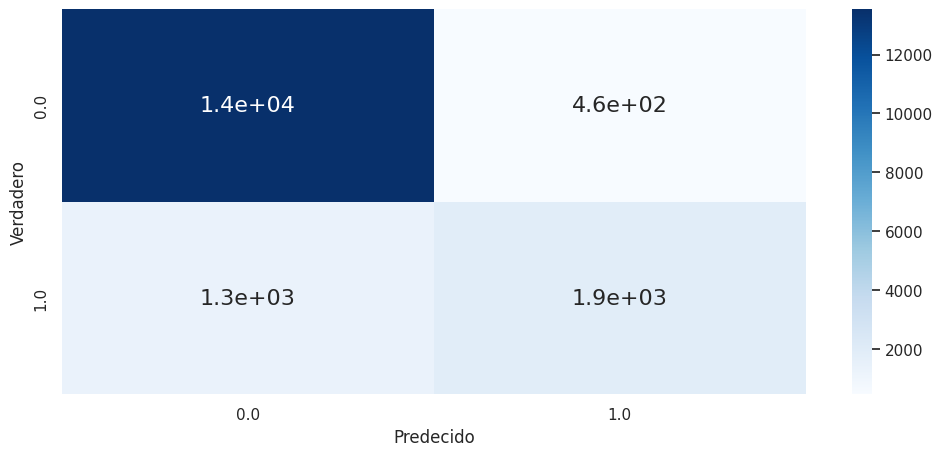

In [ ]:
final_model = GradientBoostingClassifier(max_depth= 5, n_estimators= 180)
final_trained_model = evaluate_test(df_train, df_test, final_model)


              precision    recall  f1-score   support

         0.0       0.98      0.81      0.88     13997
         1.0       0.52      0.92      0.67      3231

    accuracy                           0.83     17228
   macro avg       0.75      0.86      0.77     17228
weighted avg       0.89      0.83      0.84     17228



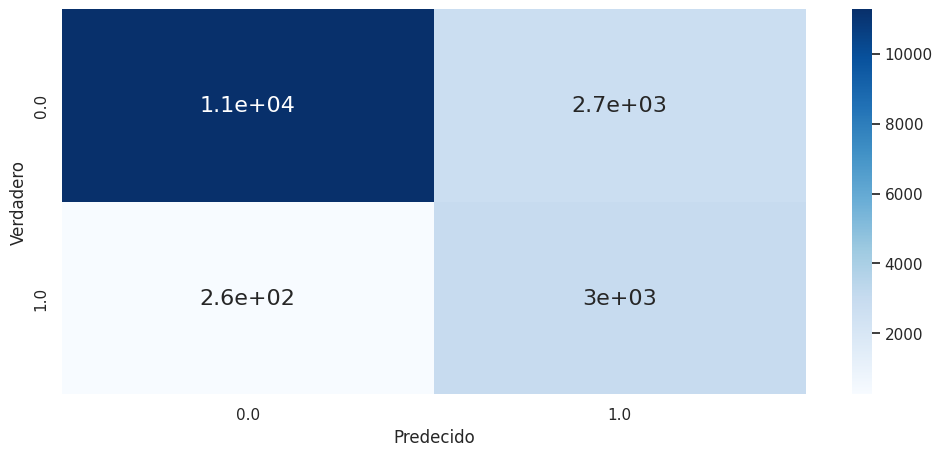

In [ ]:
final_model_sub = GradientBoostingClassifier(max_depth=5, n_estimators=180)
final_trained_model_sub = evaluate_test(df_train_sub, df_test, final_model_sub)


              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89     13997
         1.0       0.54      0.90      0.67      3231

    accuracy                           0.84     17228
   macro avg       0.76      0.86      0.78     17228
weighted avg       0.89      0.84      0.85     17228



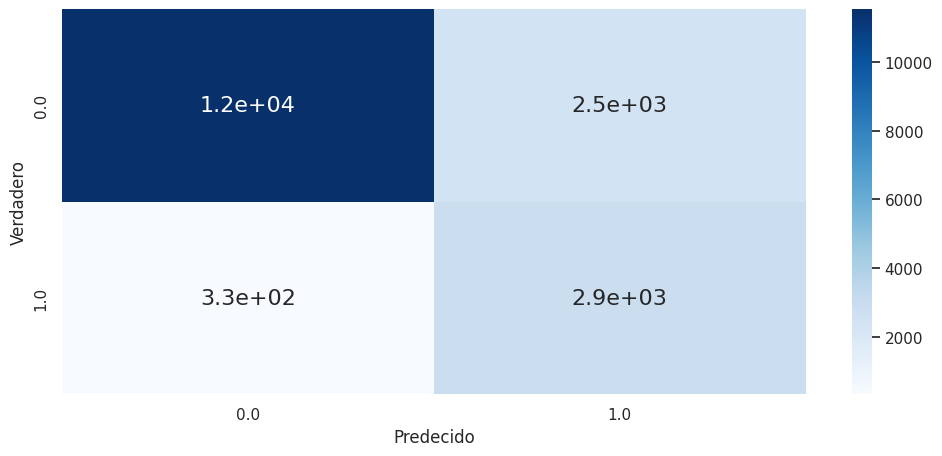

In [ ]:
final_model_over = GradientBoostingClassifier(max_depth=5, n_estimators=180)
final_trained_model_over = evaluate_test(df_train_over, df_test, final_model_over)


### Feature Importance

Solo para modelos de arboles!

In [ ]:
print(final_trained_model.feature_importances_)
feat_importances = pd.Series(
    final_trained_model.feature_importances_, index=df_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[3.90158007e-02 3.05109663e-01 7.46089689e-02 4.55467287e-03
 5.81277560e-03 1.40469920e-03 3.15368039e-03 1.39134521e-03
 3.54596821e-03 5.19514957e-01 1.57322102e-02 4.19914470e-03
 3.84042950e-03 4.13128149e-03 5.31770216e-03 2.12887708e-03
 9.15954198e-04 2.16934485e-03 2.55872948e-04 1.16839640e-03
 1.09463133e-03 1.83295479e-04 1.20861085e-04 1.65663134e-05
 6.89889769e-05 5.43911842e-04]


ValueError: Length of values (26) does not match length of index (27)